In [1]:
import os
import sys
import subprocess
import pkg_resources


def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])


# List of required packages
required_packages = ['ipywidgets', 'jupyter', 'matplotlib', 'numpy',
                     'optuna-integration[sklearn]', 'optuna',  'pandas', 'scikit-learn']

# Check if packages are installed, and install if not
for package in required_packages:
    try:
        pkg_resources.get_distribution(package)
    except pkg_resources.DistributionNotFound:
        install(package)

# Check if the environment is activated
if 'CONDA_DEFAULT_ENV' in os.environ:
    print(f"Environment '{os.environ['CONDA_DEFAULT_ENV']}' is activated.")
else:
    print("No specific environment is activated.")

Environment 'research' is activated.


In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
from warnings import simplefilter

if not sys.warnoptions:
    simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"
np.random.seed(42)

In [3]:
# # Load the store sales dataset
# excel_file = pd.ExcelFile('data/store_sales.xlsx')
# sheet_names = excel_file.sheet_names

# # Read the data
# results_df = pd.read_excel(excel_file, sheet_name=sheet_names[2])  # 2, 9
# iri_key_counts = results_df['IRI_KEY'].value_counts()
# iri_keys = iri_key_counts[iri_key_counts > 300].index


# features = ['F', 'D', 'Unit.Price']
# target = ['Total.Volume']

# results_df = results_df[results_df['IRI_KEY'] == iri_keys[0]]
# X = results_df[features]
# y = results_df[target]

# sheet_names, iri_keys, X.shape, y.shape

In [4]:
# Load the California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns=housing.feature_names)  # type: ignore
y = pd.DataFrame(housing.target, columns=housing.target_names)  # type: ignore

X.shape, y.shape

((20640, 8), (20640, 1))

In [5]:
# # Load the soybean dataset
# raw_df = pd.read_excel("data/soybean.xlsx")
# # X = raw_df.values[:-1, [5, 6, 15, 16, 17, 26,
# #                         34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]  # 9 check yield 12 rm band
# # y = raw_df.values[:-1, 11]
# X = raw_df.iloc[:-1, [5, 6, 15, 16, 17, 26,
#                   34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]
# y = raw_df.iloc[:-1, [11]]
# X.shape, y.shape

In [6]:
# # Define the data
# data = {
#     "Size": [850, 900, 1200, 1400, 1600, 1700, 1800, 2000, 2200, 2500],
#     "Bedrooms": [2, 3, 3, 3, 3, 4, 4, 4, 5, 5],
#     "Price": [300, 340, 400, 500, 520, 580, 600, 620, 720, 790]
# }

# df = pd.DataFrame(data)

# X = df[["Size", "Bedrooms"]]
# y = df[["Price"]]
# X.shape, y.shape

In [7]:
display(X.describe(), y.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [8]:
# # Remove Outliers
# def remove_outliers(df, threshold=3):
#     z_scores = np.abs((df - df.mean()) / df.std())
#     return df[(z_scores < threshold).all(axis=1)]
# filtered_train_data = train_data
# for col in train_data.columns:
#     value_counts = train_data[col].value_counts().sort(by='count')
#     valid = value_counts.filter(pl.col('count') > value_counts['count'].max()/len(value_counts))[col]
#     filtered_train_data = filtered_train_data.filter(pl.col(col).is_in(valid))
# display(filtered_train_data, filtered_train_data.describe())

In [9]:
# Plot data
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(X, y, cols=4):
    fig, axs = plt.subplots(
        (X.shape[1]+X.shape[1]*y.shape[1] + y.shape[1]+cols-1)//cols, cols, figsize=(20, 15))
    axs = axs.flatten()

    a = 0
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.tick_params(axis='both', which='major')
        ax.tick_params(axis='both', which='minor')
    a += i + 1
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        for j, ycol in enumerate(y.columns):
            ax = axs[a+i+j*y.shape[1]]
            sns.scatterplot(x=data, y=y[ycol], ax=ax)
            ax.set_title(f'{col} vs {ycol}')
            ax.set_xlabel(col)
            ax.set_ylabel(ycol)
    a += i + 1
    for i, col in enumerate(y.columns):
        data = y[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
    a += i+1
    for j in range(a, len(axs)):
        fig.delaxes(axs[j])

    fig.tight_layout()
    plt.show()
    
# plot_data(X, y)

In [10]:
# Define search
from optuna.integration.sklearn import OptunaSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

SCALERS = {
    'identity': FunctionTransformer(func=None, inverse_func=None),
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler(),
    'quantile': QuantileTransformer(),
}

search_params = {
    'cv': 10,
    'n_jobs': -1,  # -1,
    'n_trials': 1,
    # 'n_trials': None,
    'random_state': 42,
    'return_train_score': True,
    'scoring': 'neg_root_mean_squared_error',
    # 'timeout': 10,
    'timeout': None,
    'verbose': 1
}

default_search = SCALERS['robust']  # SCALERS['identity']


def search(model, param_grid={}, scaler=default_search, search_params=search_params):
    # search_params['n_trials'] = int(4**len(param_grid))
    return OptunaSearchCV(Pipeline([('scaler', scaler), ('model', model)]), {f'model__{k}': v for k, v in param_grid.items()}, **search_params)

In [11]:
# Define search grids
from optuna.distributions import CategoricalDistribution, IntDistribution, FloatDistribution

mlp_sk_param_grid = {
    'learning_rate_init': FloatDistribution(1e-5, 1e-2, log=True),
    'max_iter': IntDistribution(200, 200, log=True),
    # 'early_stopping': CategoricalDistribution([True]),
}

fonn1_sk_param_grid = {
    'learning_rate_init': FloatDistribution(1e-5, 1e-2, log=True),
    'max_iter': IntDistribution(200, 200, log=True),
}

fonn2_sk_param_grid = {
    'learning_rate_init': FloatDistribution(1e-5, 1e-2, log=True),
    'max_iter': IntDistribution(200, 200, log=True),
}

mlp_param_grid = {
    'learning_rate': FloatDistribution(1e-3, 1e-1, log=True),
    'epochs': CategoricalDistribution([100]),
    'max_iter': IntDistribution(200, 200, log=True),
}

In [12]:
from models_sklearn import Tree, Ensemble, MLP_sk, FONN1_sk, FONN2_sk, TREENN1_sk, TREENN2_sk
from models import MLP, FONN1, FONN2, TREENN1, TREENN2

models = {}

num_trees_input = 5
num_trees_hidden = 5
# hidden_nodes = [10]
hidden_nodes = [5, 10]

# scalers = ['identity', 'robust']
scalers = ['robust']

models['Tree'] = search(Tree())
for hn in hidden_nodes:
    for s in scalers:
        scaler = SCALERS[s]
        models[f'Ensemble_sk_{s} {hn}'] = search(Ensemble(hn))
        models[f'MLP_sk_{s} {hn}'] = search(
            MLP_sk(hn), mlp_sk_param_grid, scaler)
        models[f'MLP_sk_tanh_{s} {hn}'] = search(
            MLP_sk(hn, activation='tanh'), mlp_sk_param_grid, scaler)
        models[f'FONN1_sk_{s} {num_trees_input} {hn}'] = search(
            FONN1_sk(num_trees_input, num_trees_input+hn), fonn1_sk_param_grid, scaler)
        models[f'FONN2_sk_{s} {num_trees_hidden} {hn}'] = search(
            FONN2_sk(hn, num_trees_hidden+hn), fonn2_sk_param_grid, scaler)
        # if isinstance(hn, tuple):
            #     models[f'Ensemble {sum(hn)}'] = search(Ensemble(sum(hn)))
            #     models[f'FONN1_sk {num_trees_input} {hn}'] = search(
            #         FONN1_sk(num_trees_input, (num_trees_input+hn[0], *hn[1:])), mlp_sk_param_grid)
            #     models[f'FONN2_sk {num_trees_hidden} {hn}'] = search(
            #         FONN2_sk(num_trees_hidden, (*hn[:-1], num_trees_hidden+hn[-1])), mlp_sk_param_grid)
            #     models[f'TREENN1_sk {hn}'] = search(
            #         TREENN1_sk((1+hn[0], *hn[1:])), mlp_sk_param_grid)
            #     models[f'TREENN2_sk {hn}'] = search(
            #         TREENN2_sk((*hn[:-1], 1+hn[-1])), mlp_sk_param_grid)

input_dim = X.shape[1]
output_dim = 1

# for hn in hidden_nodes:
#     models[f'MLP {hn}'] = search(
#         MLP(input_dim, hn, output_dim), mlp_param_grid)
#     models[f'MLP_tanh {hn}'] = search(
#         MLP(input_dim, hn, output_dim, activation='tanh'), mlp_param_grid)
#     models[f'FONN1 {num_trees_input} {hn}'] = search(
#         FONN1(input_dim, hn, output_dim, num_trees_input), mlp_param_grid)
#     models[f'FONN2 {num_trees_hidden} {hn}'] = search(
#         FONN2(input_dim, hn, output_dim, num_trees_hidden), mlp_param_grid)
#     models[f'TREENN1 {hn}'] = search(
#         FONN1(input_dim, hn, output_dim, 1), mlp_param_grid)
#     models[f'TREENN2 {hn}'] = search(
#         FONN2(input_dim, hn, output_dim, 1), mlp_param_grid)

display(models)

{'Tree': OptunaSearchCV(cv=10,
                estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                          ('model', Tree())]),
                n_jobs=-1, n_trials=1, param_distributions={}, random_state=42,
                return_train_score=True, scoring='neg_root_mean_squared_error',
                verbose=1),
 'Ensemble_sk_robust 5': OptunaSearchCV(cv=10,
                estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                          ('model', Ensemble(n_estimators=5))]),
                n_jobs=-1, n_trials=1, param_distributions={}, random_state=42,
                return_train_score=True, scoring='neg_root_mean_squared_error',
                verbose=1),
 'MLP_sk_robust 5': OptunaSearchCV(cv=10,
                estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                          ('model',
                                           MLP_sk(hidden_layer_sizes=5))]),
                n_jobs

In [ ]:
# Train and evaluate models
cv_results = {}
results = []

result_columns = [
    'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score'
]


def fit_model(name, model, X, y):
    print(f"Fitting {name}...")
    model.fit(X, y.to_numpy().ravel())
    result = model.cv_results_
    cv_results[name] = result
    return {
        'model': name,
        **{col: result[col][model.best_index_] for col in result}
    }


for name, model in models.items():
    results.append(fit_model(name, model, X, y))

results_df = pd.DataFrame(results)
results_df.set_index('model', inplace=True)
results_df = results_df[result_columns]

[I 2024-11-21 01:24:44,604] A new study created in memory with name: no-name-e041d97e-4027-4eb9-978d-8cf0d29bd2a4


Fitting Tree...


[I 2024-11-21 01:24:45,838] Trial 0 finished with value: -0.9217490446814655 and parameters: {}. Best is trial 0 with value: -0.9217490446814655.
[I 2024-11-21 01:24:45,975] A new study created in memory with name: no-name-1683785b-e98b-4923-b50b-5b2d0bed8d4c


Fitting Ensemble_sk_robust 5...


[I 2024-11-21 01:24:51,761] Trial 0 finished with value: -0.6876169257397166 and parameters: {}. Best is trial 0 with value: -0.6876169257397166.
[I 2024-11-21 01:24:52,399] A new study created in memory with name: no-name-0b0828bc-3fb2-4189-a2ac-8ac126138e30


Fitting MLP_sk_robust 5...


[I 2024-11-21 01:24:58,838] Trial 0 finished with value: -0.7816245709192677 and parameters: {'model__learning_rate_init': 0.0037552549220595498, 'model__max_iter': 200}. Best is trial 0 with value: -0.7816245709192677.
[I 2024-11-21 01:24:59,674] A new study created in memory with name: no-name-905302de-d688-4c82-91c2-fe6c22c52f93


Fitting MLP_sk_tanh_robust 5...


[I 2024-11-21 01:25:07,947] Trial 0 finished with value: -0.6142672704546502 and parameters: {'model__learning_rate_init': 0.009526614384365169, 'model__max_iter': 200}. Best is trial 0 with value: -0.6142672704546502.
[I 2024-11-21 01:25:09,445] A new study created in memory with name: no-name-c4975a2b-5fc8-455f-b987-161d5755b327


Fitting FONN1_sk_robust 5 5...


[I 2024-11-21 01:25:32,392] Trial 0 finished with value: -0.7137799008131428 and parameters: {'model__learning_rate_init': 9.567799080156552e-05, 'model__max_iter': 200}. Best is trial 0 with value: -0.7137799008131428.
[I 2024-11-21 01:25:34,732] A new study created in memory with name: no-name-013e389b-86ea-46b9-aa27-72a6398cea22


Fitting FONN2_sk_robust 5 5...


[I 2024-11-21 01:27:26,760] Trial 0 finished with value: -2.289640860408973 and parameters: {'model__learning_rate_init': 1.260385488000154e-05, 'model__max_iter': 200}. Best is trial 0 with value: -2.289640860408973.
[I 2024-11-21 01:27:29,733] A new study created in memory with name: no-name-0d33bd9b-5f9c-489f-bb1f-23b2f757e9ee


Fitting Ensemble_sk_robust 10...


[I 2024-11-21 01:27:44,193] Trial 0 finished with value: -0.6565670708450202 and parameters: {}. Best is trial 0 with value: -0.6565670708450202.
[I 2024-11-21 01:27:45,451] A new study created in memory with name: no-name-cc0c2adf-7c21-4e4d-a057-43b91b368748


Fitting MLP_sk_robust 10...


[I 2024-11-21 01:28:00,947] Trial 0 finished with value: -0.6403188289929161 and parameters: {'model__learning_rate_init': 0.000601034484607919, 'model__max_iter': 200}. Best is trial 0 with value: -0.6403188289929161.
[I 2024-11-21 01:28:02,935] A new study created in memory with name: no-name-d7b61b9b-75a6-4d9e-80e8-ce0639bff747


Fitting MLP_sk_tanh_robust 10...


[I 2024-11-21 01:28:23,864] Trial 0 finished with value: -0.6783531864061434 and parameters: {'model__learning_rate_init': 3.866090195119194e-05, 'model__max_iter': 200}. Best is trial 0 with value: -0.6783531864061434.
[I 2024-11-21 01:28:25,900] A new study created in memory with name: no-name-ad2fac4c-ac1e-42ee-8828-d575d2f46d78


Fitting FONN1_sk_robust 5 10...


[I 2024-11-21 01:28:39,662] Trial 0 finished with value: -0.7297081010448059 and parameters: {'model__learning_rate_init': 0.001050600399306339, 'model__max_iter': 200}. Best is trial 0 with value: -0.7297081010448059.
[I 2024-11-21 01:28:40,786] A new study created in memory with name: no-name-e122a80d-d4ca-458a-a749-4f49e3ddaeda


Fitting FONN2_sk_robust 5 10...


[I 2024-11-21 01:29:28,202] Trial 0 finished with value: -1.3440488945404294 and parameters: {'model__learning_rate_init': 0.0015288450075152372, 'model__max_iter': 200}. Best is trial 0 with value: -1.3440488945404294.


In [ ]:
display(results_df,
        results_df.sort_values(by='mean_test_score', ascending=False),
        results_df.sort_values(by='mean_train_score', ascending=False))

,mean_fit_time,mean_score_time,mean_train_score,mean_test_score
model,,,,
MLP_sk_tanh_robust 10,1.725416,0.001489,-0.578292,-0.620536
MLP_sk_tanh_robust 5,1.071991,0.001367,-0.576294,-0.620682
MLP_sk_robust 10,2.029237,0.001447,-0.617001,-0.649200
FONN1_sk_robust 5 10,1.540409,0.003409,-0.272732,-0.723800
FONN1_sk_robust 5 5,1.295509,0.005361,-0.334728,-0.746983
Tree,0.118466,0.001618,-0.441500,-0.921749
MLP_sk_robust 5,1.845346,0.001586,-1.035396,-0.938925
FONN2_sk_robust 5 10,10.008385,0.001282,-2.681577,-2.521896
FONN2_sk_robust 5 5,7.450785,0.001315,-4.056416,-2.547713


In [ ]:
pd.DataFrame({name: model.best_params_ for name,
             model in models.items()}).transpose()

,model__learning_rate_init,model__max_iter
Tree,NaN,NaN
MLP_sk_robust 5,0.000154,200.0
MLP_sk_tanh_robust 5,0.006156,200.0
FONN1_sk_robust 5 5,0.003722,200.0
FONN2_sk_robust 5 5,0.000029,200.0
MLP_sk_robust 10,0.000157,200.0
MLP_sk_tanh_robust 10,0.000594,200.0
FONN1_sk_robust 5 10,0.001176,200.0
FONN2_sk_robust 5 10,0.000106,200.0


In [ ]:
# Predictions
predictions = pd.DataFrame(
    {name: model.best_estimator_.predict(X) for name, model in models.items()})
display(pd.concat([y, predictions], axis=1),
        pd.concat([y, predictions], axis=1).describe())

,MedHouseVal,Tree,MLP_sk_robust 5,MLP_sk_tanh_robust 5,FONN1_sk_robust 5 5,FONN2_sk_robust 5 5,MLP_sk_robust 10,MLP_sk_tanh_robust 10,FONN1_sk_robust 5 10,FONN2_sk_robust 5 10
0,4.526,4.52600,4.349111,4.637453,4.431120,4.259495,4.139985,4.525196,4.150071,5.172229
1,3.585,3.58500,4.407292,4.878580,3.771807,4.326680,4.686009,4.466011,3.486365,4.558346
2,3.521,5.00001,4.119895,4.174370,3.791695,3.872601,3.863146,4.235270,3.561941,4.182429
3,3.413,3.41300,3.525472,3.676224,3.452678,3.099238,3.421071,3.554288,3.391433,3.722612
4,3.422,3.42200,2.815110,2.935839,3.169694,2.388482,2.849397,2.873940,3.226551,3.038108
...,...,...,...,...,...,...,...,...,...,...
20635,0.781,0.77100,0.637540,0.807737,0.826314,0.742593,0.394794,0.654801,0.674843,0.897007
20636,0.771,0.77100,1.000647,0.982762,0.817782,0.878405,0.973229,0.877713,0.732728,0.395411
20637,0.923,0.92300,0.591721,1.007149,0.772607,0.899199,0.525700,0.962811,0.957360,1.141574
20638,0.847,0.92300,0.688224,1.048117,0.731268,0.907014,0.691256,1.049323,0.814322,1.170773


,MedHouseVal,Tree,MLP_sk_robust 5,MLP_sk_tanh_robust 5,FONN1_sk_robust 5 5,FONN2_sk_robust 5 5,MLP_sk_robust 10,MLP_sk_tanh_robust 10,FONN1_sk_robust 5 10,FONN2_sk_robust 5 10
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,2.077487,2.065159,2.041937,2.075312,2.069965,2.062315,2.068189,2.052351,2.082880
std,1.153956,1.156396,0.968773,1.000517,1.129294,1.099082,0.975563,0.996531,1.117734,1.255844
min,0.149990,0.149990,-0.749320,-0.208632,-5.152410,0.236511,-1.090694,-0.685790,-0.616984,-1.511534
25%,1.196000,1.198000,1.347034,1.295282,1.226933,1.441955,1.361157,1.333860,1.209001,1.201523
50%,1.797000,1.813000,1.910517,1.831040,1.823905,1.897357,1.908385,1.872684,1.804228,1.836982
75%,2.647250,2.674000,2.635073,2.583459,2.650667,2.488315,2.639281,2.601110,2.625962,2.673432
max,5.000010,5.000010,7.605333,5.257698,5.381508,73.612764,6.737649,5.952189,6.486828,20.903495


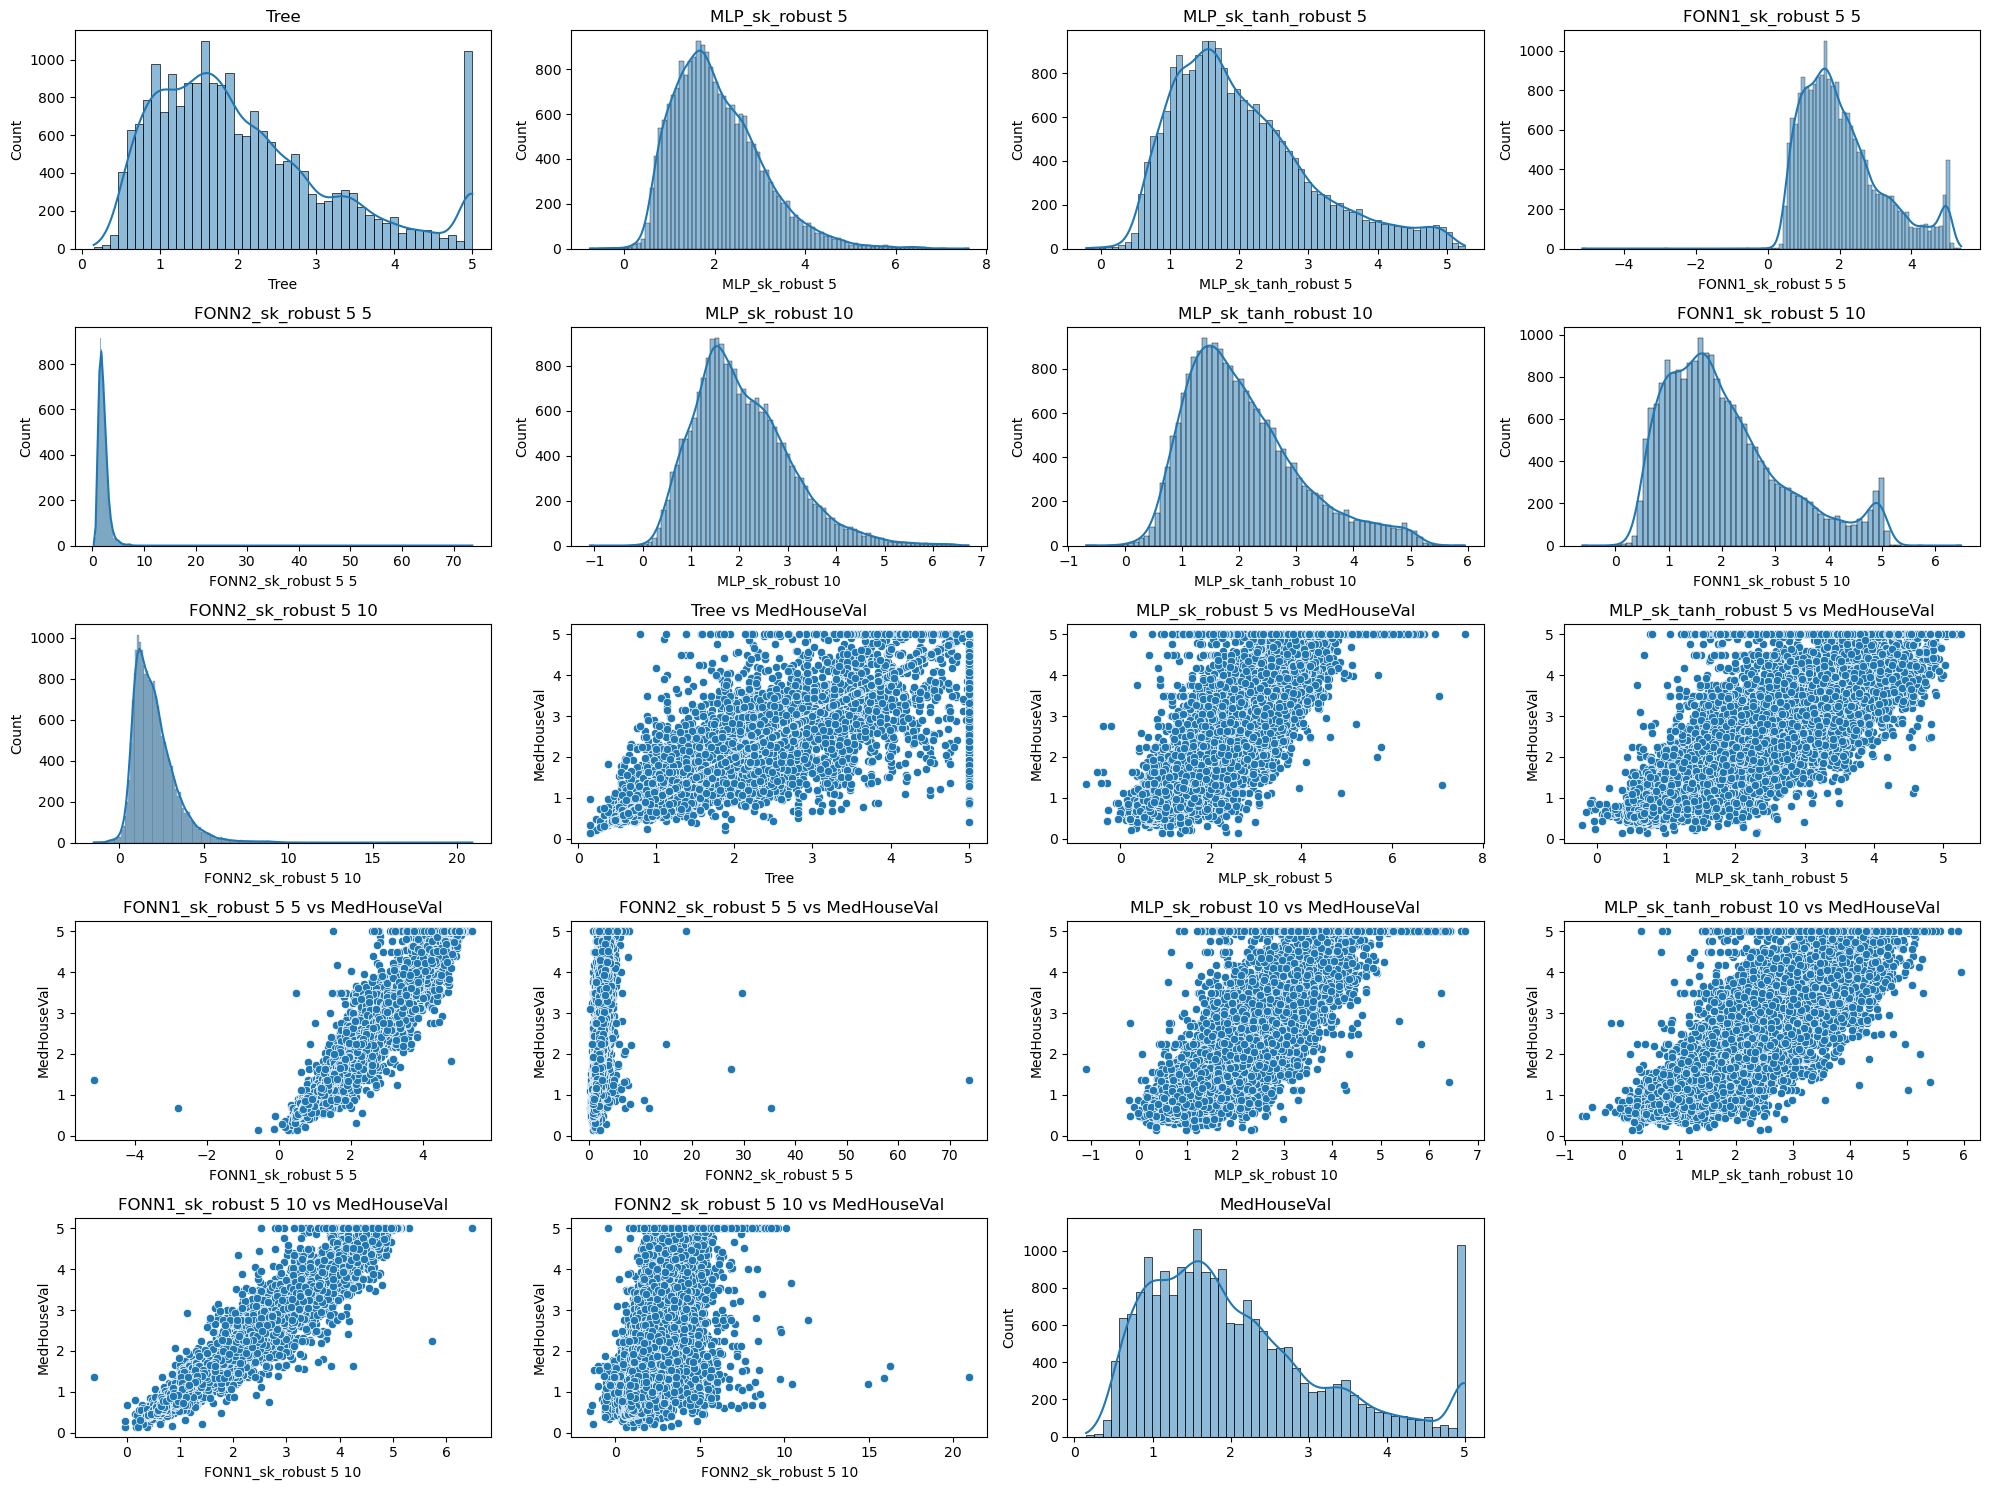

In [ ]:
# Plot Predictions
plot_data(predictions, y)

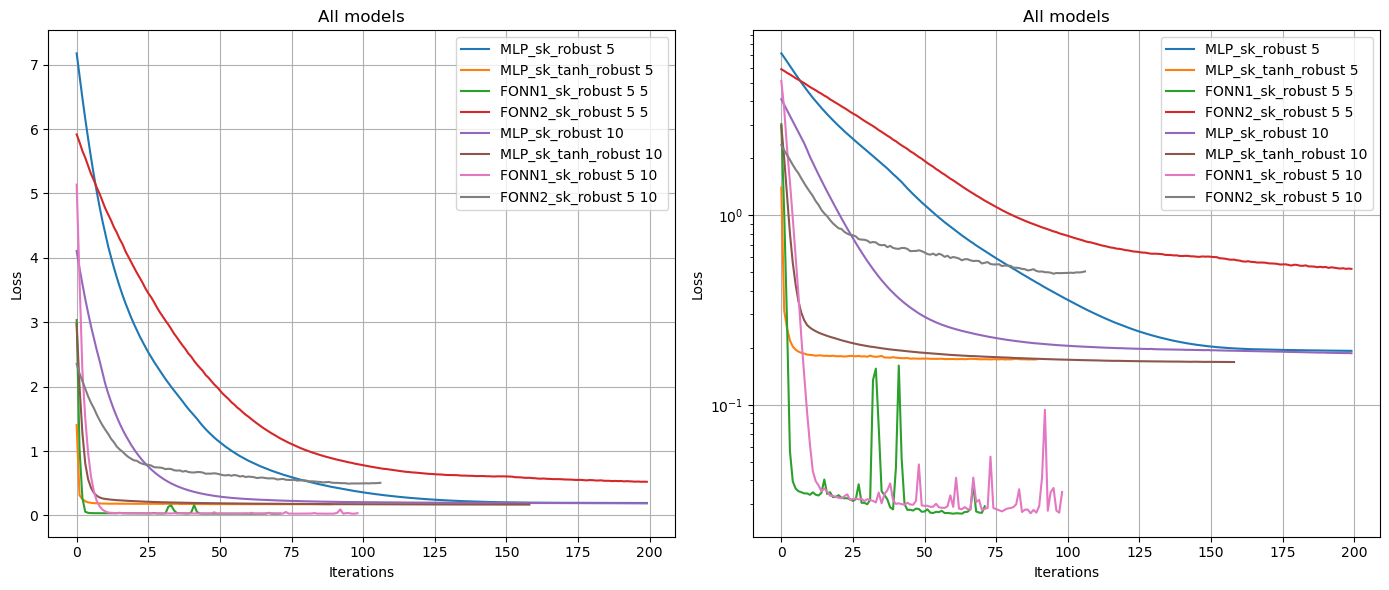

In [ ]:
import matplotlib.pyplot as plt


def plot_loss(model, ax1, ax2, label):
    ax1.plot(model.loss_curve_, label=label)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')
    ax1.grid(True)

    ax2.plot(model.loss_curve_, label=label)
    ax2.set_yscale('log')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Loss')
    ax2.grid(True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for model_name, model in models.items():
    if hasattr(model.best_estimator_['model'], 'loss_curve_'):
        plot_loss(model.best_estimator_['model'], ax1, ax2, label=model_name)

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss')
ax1.set_title('All models')
ax1.legend()
ax1.grid(True)

ax2.set_yscale('log')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Loss')
ax2.set_title('All models')
ax2.legend()
ax2.grid(True)

fig.tight_layout()
fig.show()

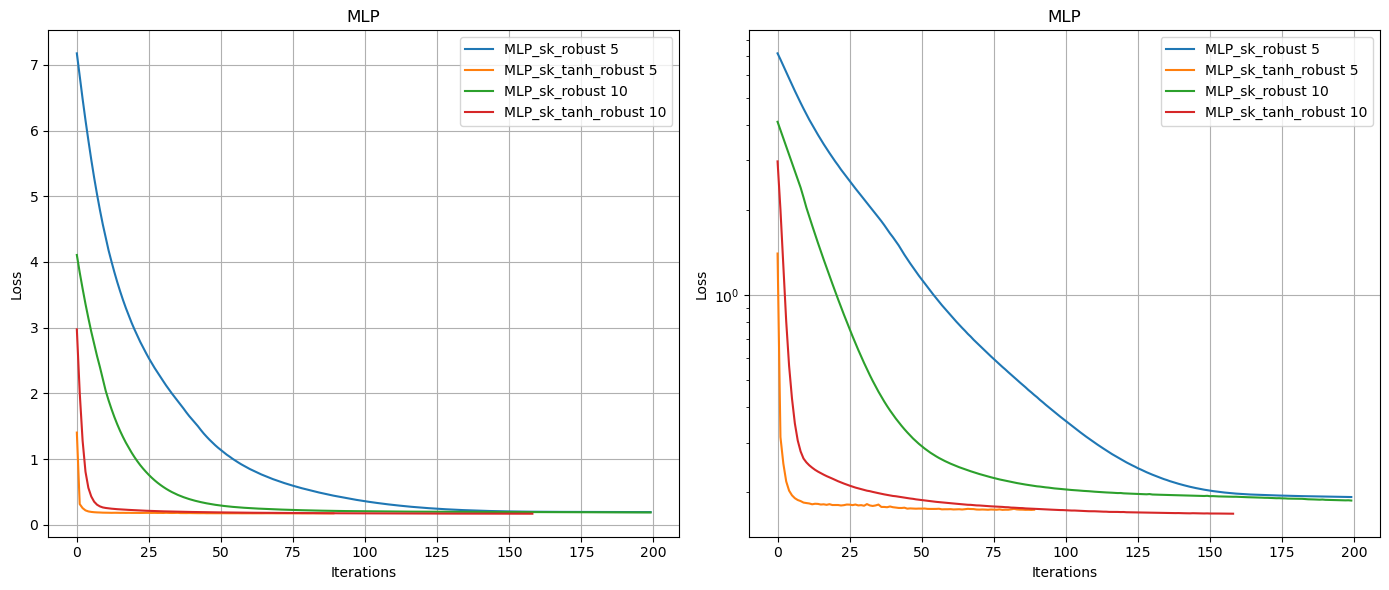

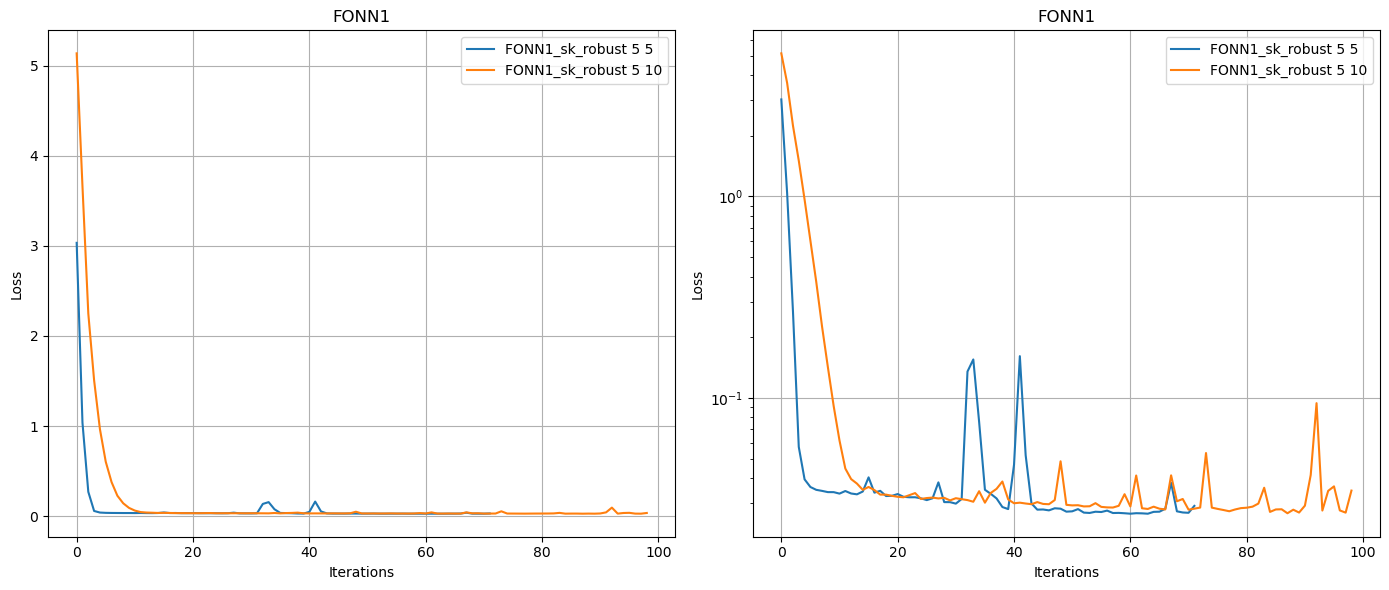

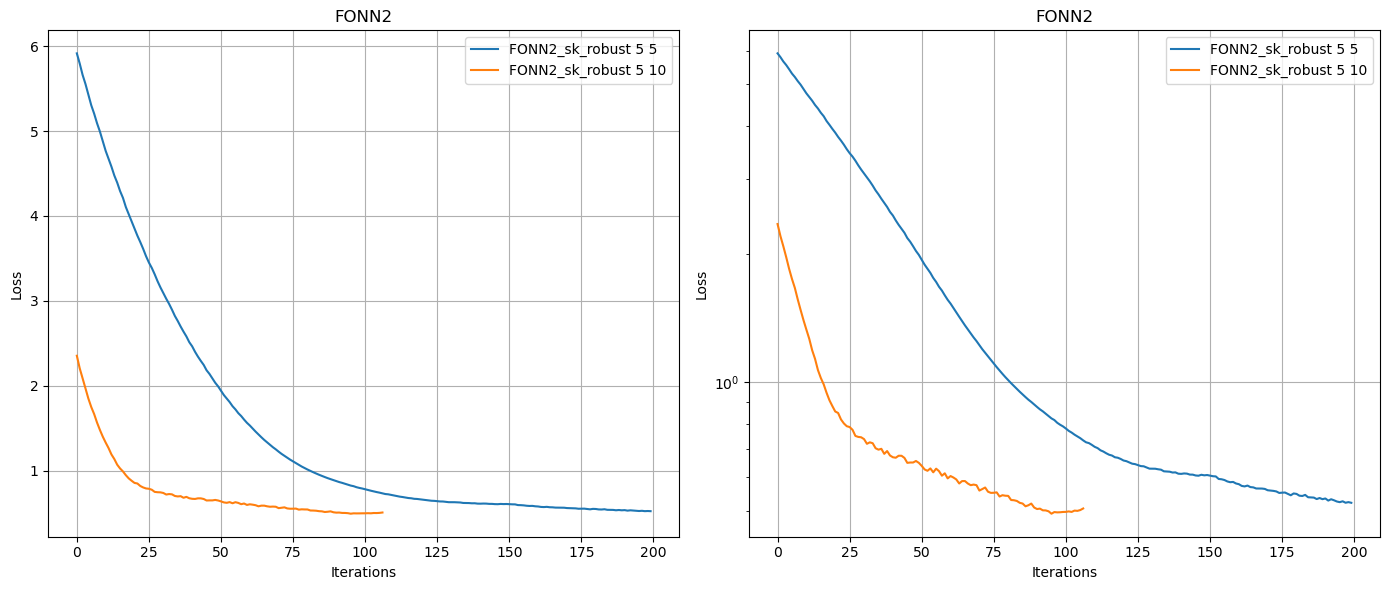

In [ ]:
import matplotlib.pyplot as plt

plot_groups = {}
for model_name, model in models.items():
    if hasattr(model.best_estimator_['model'], 'loss_curve_'):
        key = model_name.split('_' if '_' in model_name else ' ')[0]
        if key not in plot_groups:
            plot_groups[key] = plt.subplots(1, 2, figsize=(14, 6))
        fig, (ax1, ax2) = plot_groups[key]
        plot_loss(model.best_estimator_['model'], ax1, ax2, model_name)

for group, plot in plot_groups.items():
    fig, (ax1, ax2) = plot
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')
    ax1.set_title(group)
    ax1.legend()
    ax1.grid(True)

    ax2.set_yscale('log')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Loss')
    ax2.set_title(group)
    ax2.legend()
    ax2.grid(True)

    fig.tight_layout()
    fig.show()

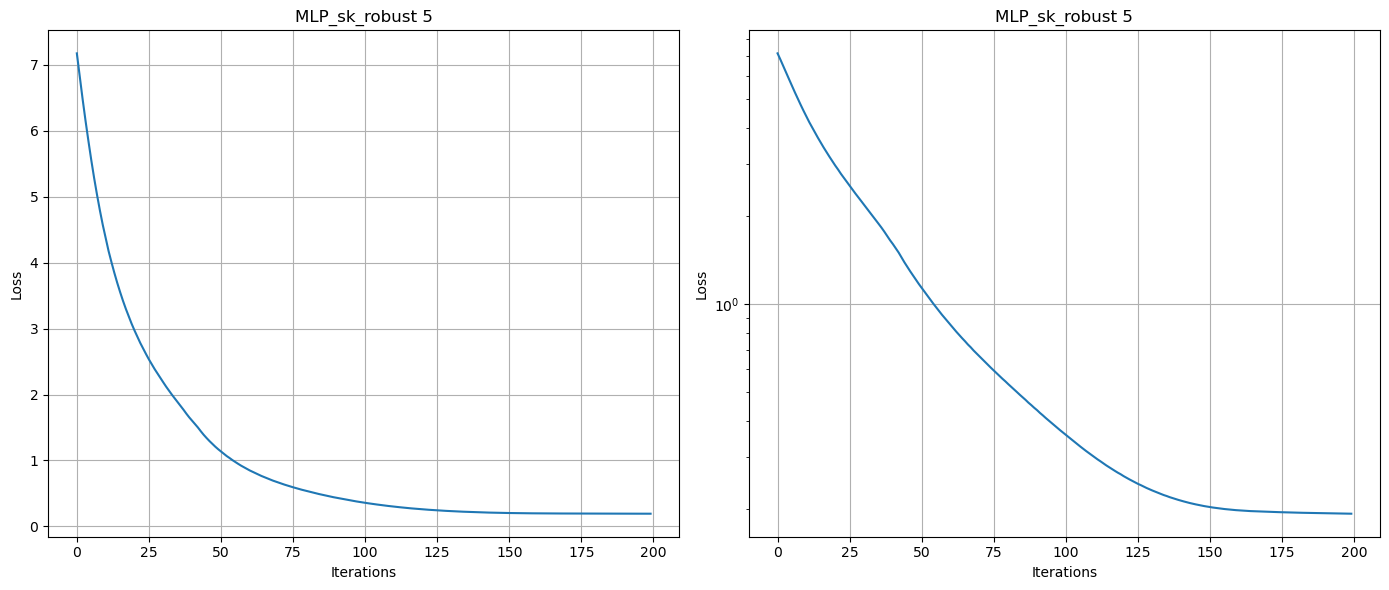

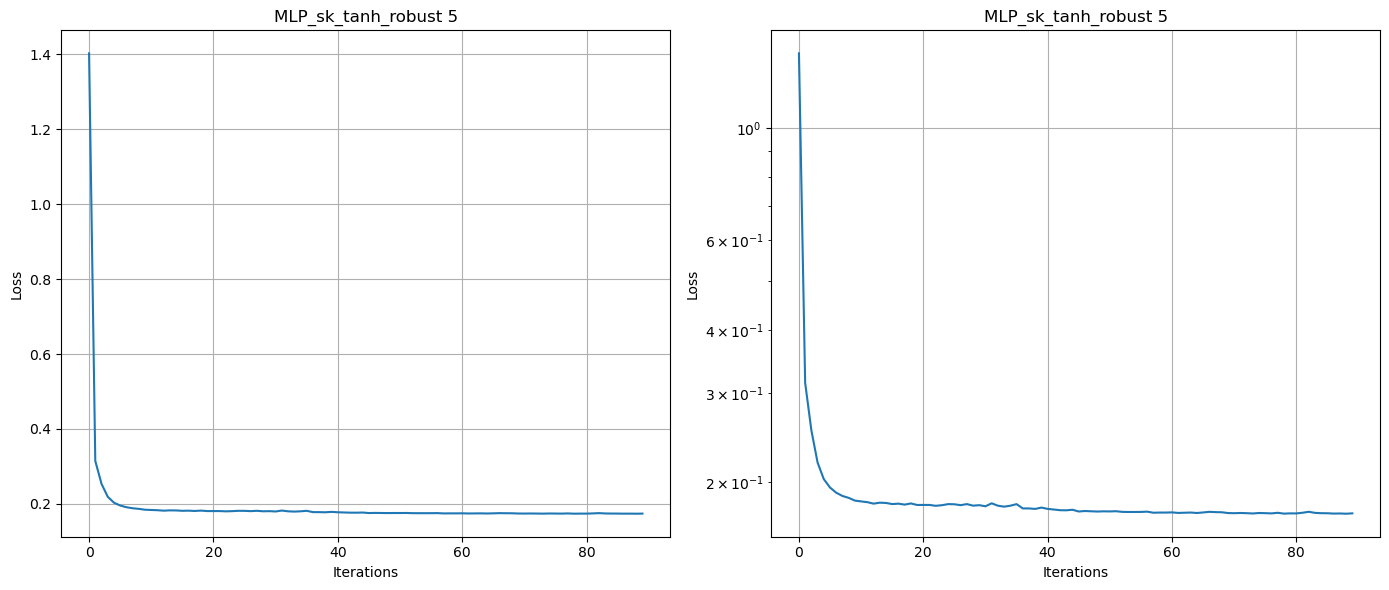

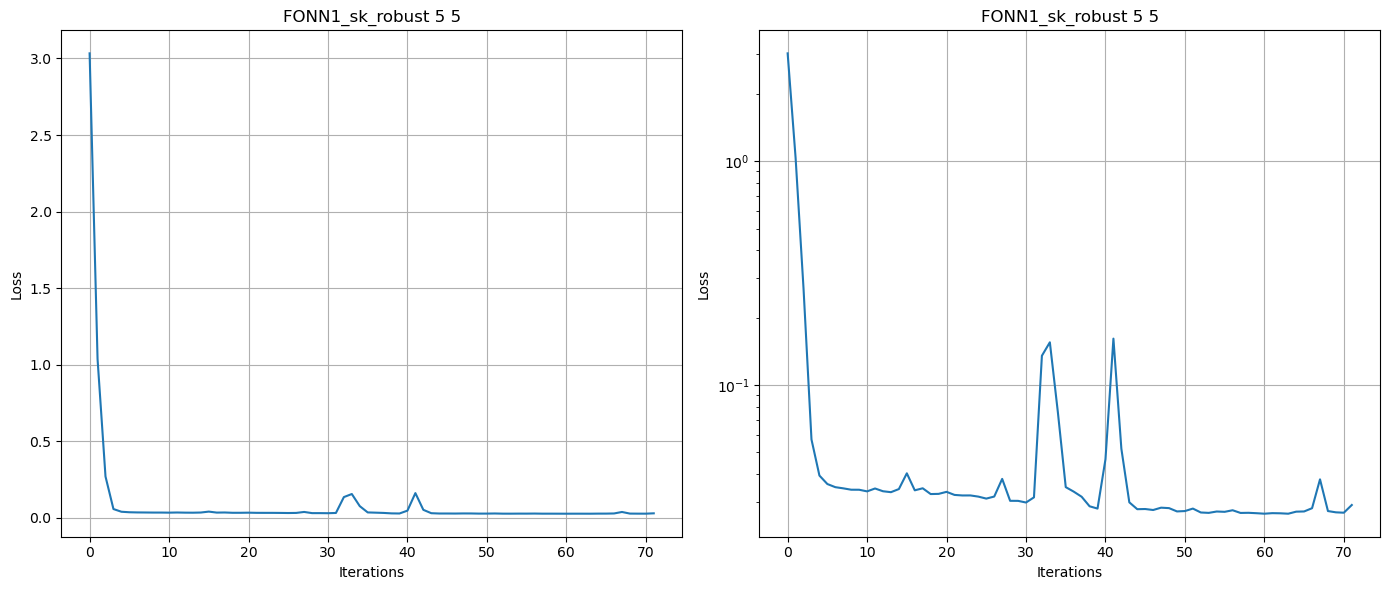

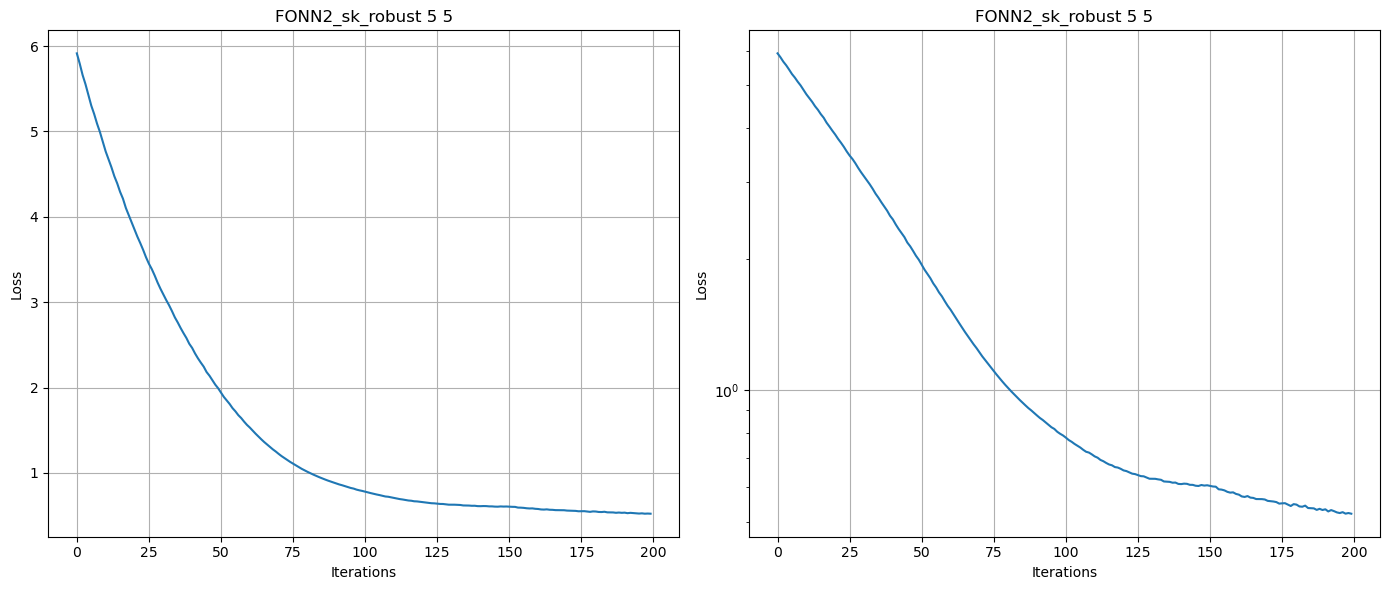

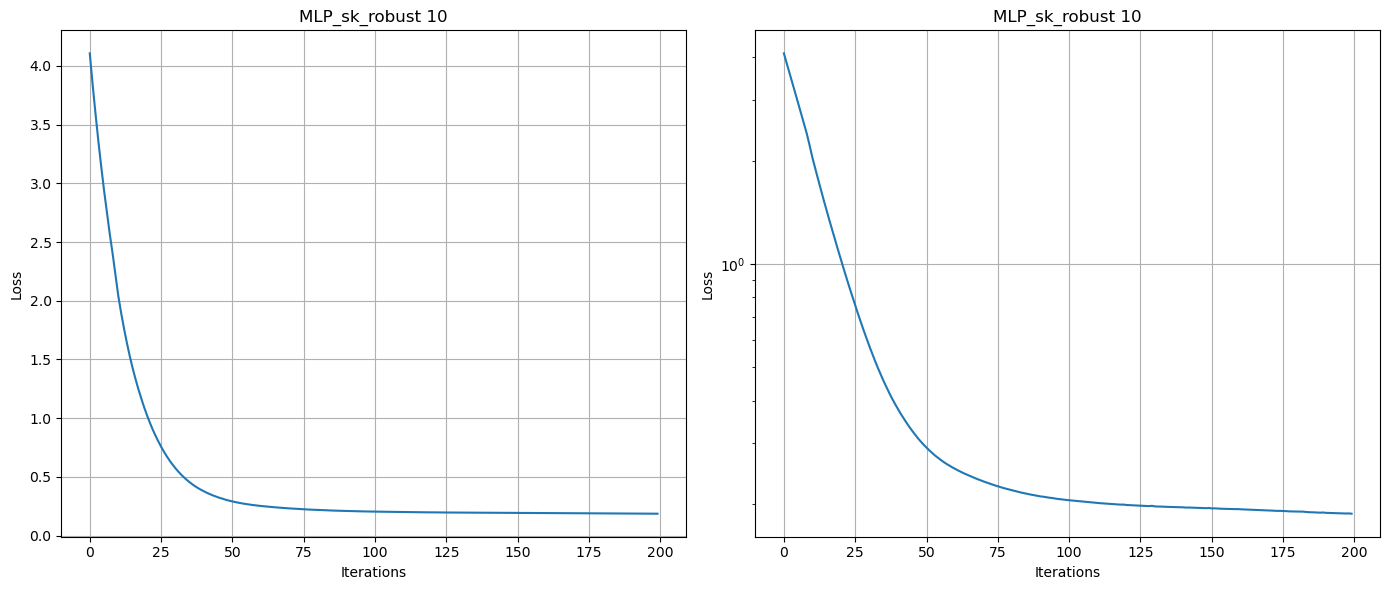

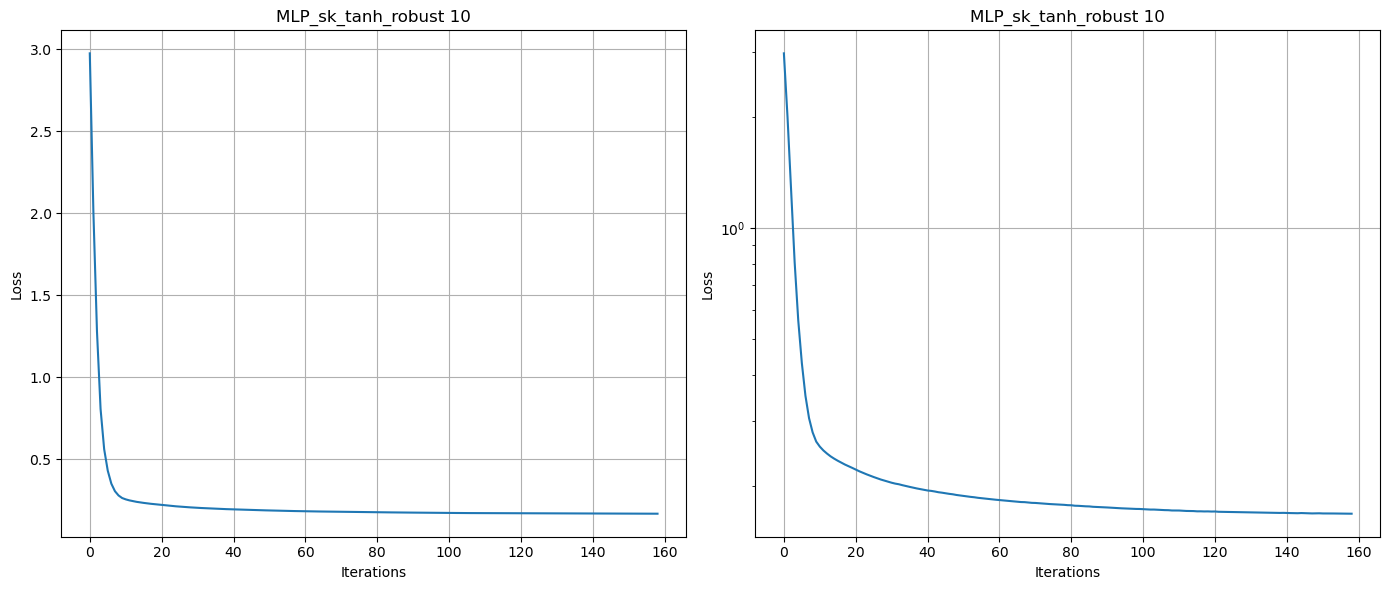

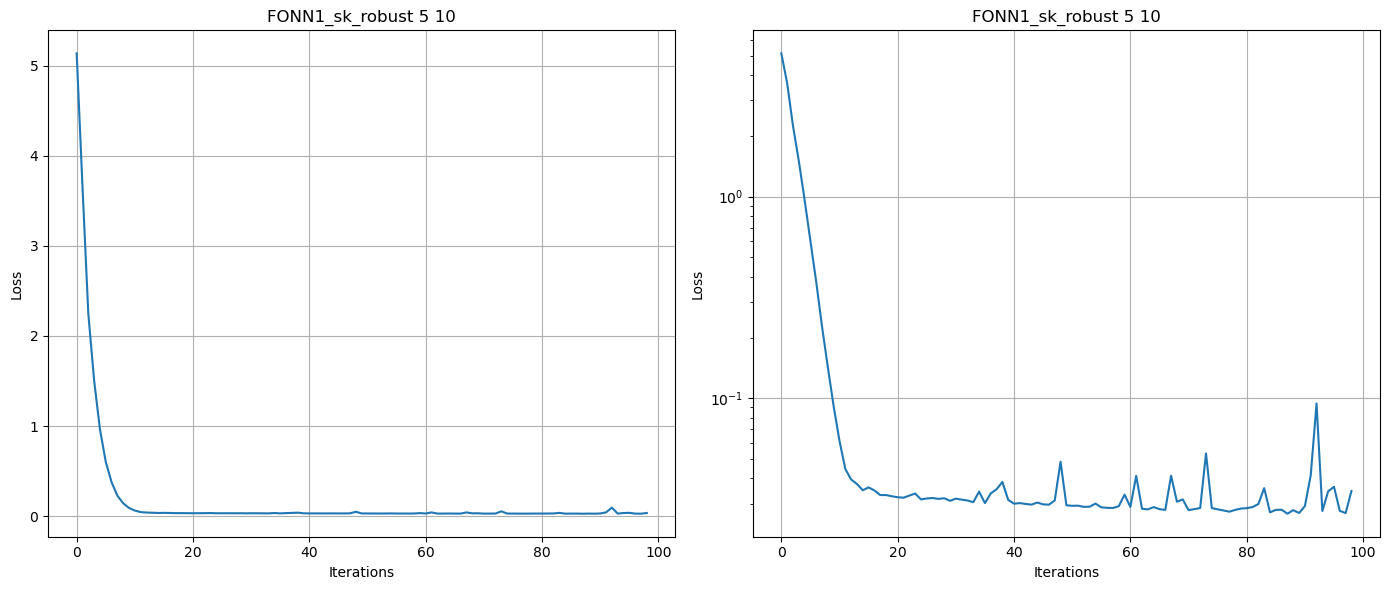

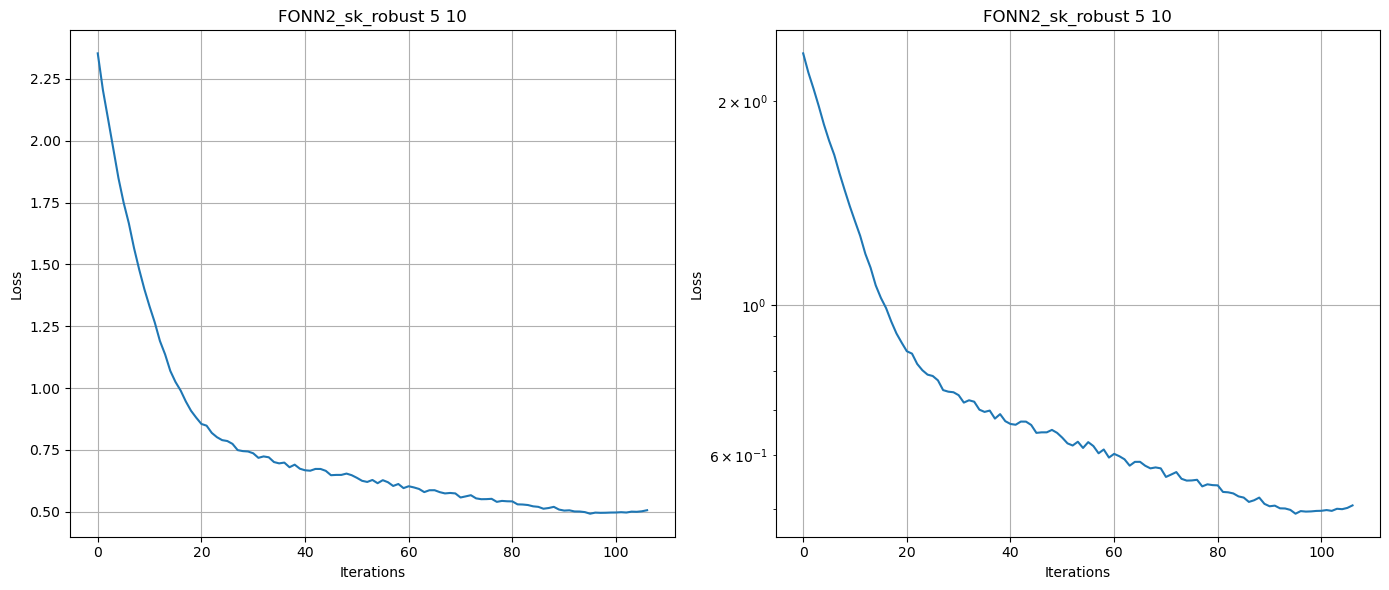

In [ ]:
for model_name, model in models.items():
    if hasattr(model.best_estimator_['model'], 'loss_curve_'):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        plot_loss(model.best_estimator_['model'], ax1, ax2, model_name)
        ax1.set_title(model_name)
        ax2.set_title(model_name)
        fig.tight_layout()
        fig.show()